In [26]:
import pandas as pd
from pandas import DataFrame, read_csv
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


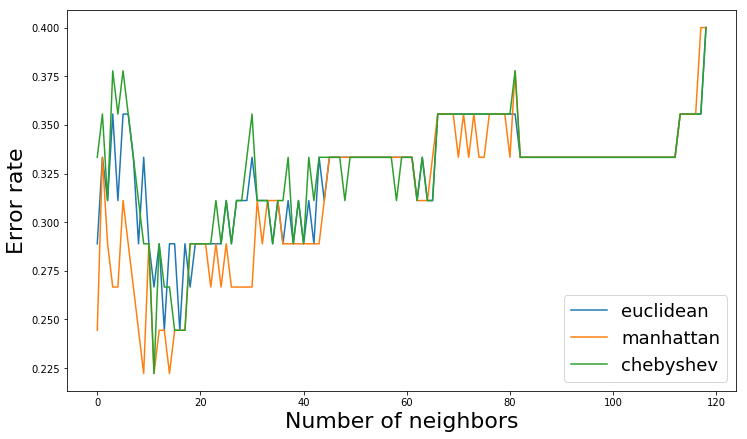

In [50]:
column_names = ['Sort','Alcohol','Malic acid','Ash','Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv('winedata', names = column_names)

#Извлекаю из данных признаки и классы
wine = data['Sort']
features = data.drop(columns='Sort')

#Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(features, wine, random_state=1)

#Масштабирование признаков
scaler = preprocessing.StandardScaler().fit(X_train)

#Модель для i соседей
errors = {'euclidean':[], 'manhattan':[], 'chebyshev':[]}
for metrics in errors.keys():
    for i in range(1,120):
        knn = KNeighborsClassifier(n_neighbors=i, metric = metrics) 
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        errors[metrics].append(np.mean(y_pred != y_test))

plt.figure(figsize=(12,7))
plt.xlabel('Number of neighbors', fontsize=22)
plt.ylabel('Error rate', fontsize=22)

for metrics in errors.keys():
    plt.plot(errors[metrics], label=metrics)
    
plt.legend(fontsize=18)    